In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [6]:
from google.colab import files
uploaded = files.upload()

Saving processed_dataset.zip to processed_dataset.zip


In [7]:
import zipfile
import os

zip_path = "processed_dataset.zip"
extract_path = "processed_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)

Extracted to: processed_dataset


In [13]:
def load_processed_images(data_dir, img_size=(128, 128)):
    X, y = [], []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(class_path, img_file)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        img = cv2.resize(img, img_size)
                        img = img.astype('float32') / 255.0
                        X.append(img)
                        y.append(class_idx)

    return np.array(X), np.array(y), class_names

In [23]:
import os

print("Classes found in dataset folder:")
print(os.listdir("processed_dataset/processed_dataset"))

Classes found in dataset folder:
['035', '014', '015', '037', '006', '008', '025', '002', '026', '034', '007', '039', '036', '032', '013', '031', '011', '017', '022', '003', '028', '009', '033', '010', '018', '020', '021', '030', '019', '004', '041', '016', '023', '027', '005', '038', '029', '024', '001', '040', '012']


In [19]:
data_path = "processed_dataset/processed_dataset"
X, y, class_labels = load_processed_images(data_path)

In [20]:
X = X.reshape(-1, 128, 128, 1)
y = to_categorical(y, num_classes=len(class_labels))

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}")

Train shape: (1289, 128, 128, 1), Validation shape: (323, 128, 128, 1)


In [24]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_labels), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 41)             │         5,289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,397,033 (28.22 MB)

 Trainable params: 7,397,033 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=16
)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.0277 - loss: 3.8553 - val_accuracy: 0.2229 - val_loss: 3.3837
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2427 - loss: 3.0411 - val_accuracy: 0.5913 - val_loss: 1.8570
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5979 - loss: 1.5445 - val_accuracy: 0.7399 - val_loss: 1.1886
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7397 - loss: 0.9353 - val_accuracy: 0.7709 - val_loss: 0.9047
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8447 - loss: 0.5631 - val_accuracy: 0.8235 - val_loss: 0.7309
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8951 - loss: 0.3706 - val_accuracy: 0.8173 - val_loss: 0.7114
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9102 - loss: 0.3109 - val_accuracy: 0.8452 - val_loss: 0.6508
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9284 - loss: 0.2260 - val_accuracy: 0.8452 - va

####**Performance Summary**
Initial accuracy was ~2.7% (random guessing)

Best validation accuracy: ~84.5% at Epoch 7–8

Final training accuracy: 94.5%

Slight overfitting begins after epoch 8 (train accuracy increases but val accuracy plateaus or dips)

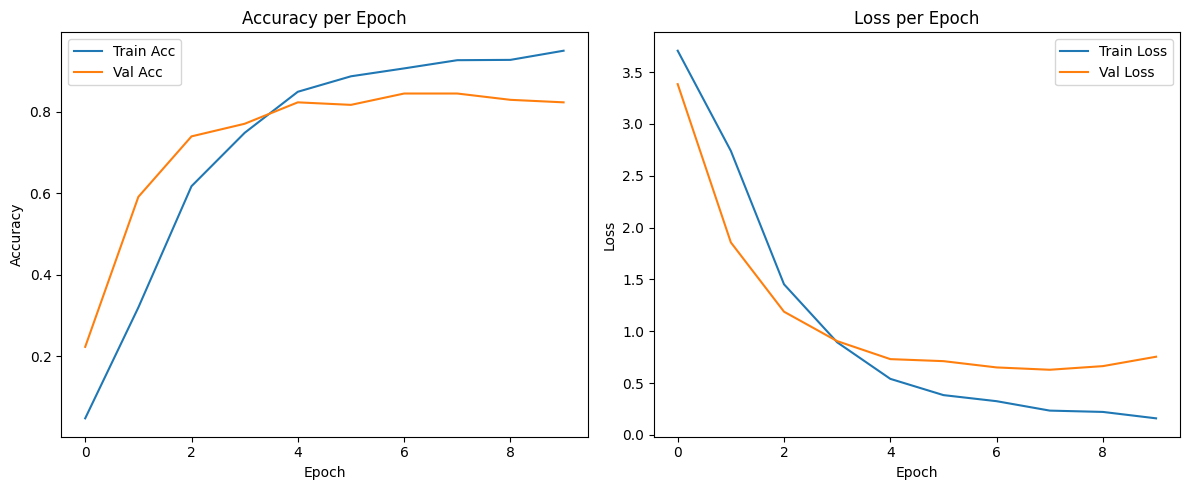

In [26]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()